# 1. Least Square Estimation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X_and_Y = np.load('./q1-least-square.npy')
X = X_and_Y[:, 0] # Shape: (300,)
Y = X_and_Y[:, 1] # Shape: (300,)

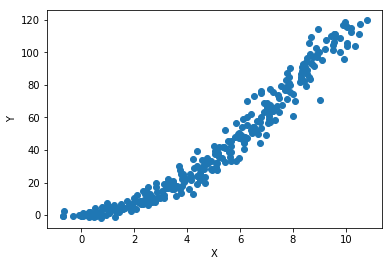

In [2]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
# Assume Y = w0 + w1*X = (w0, w1).(1, X) = W.X1
# X1 contains 1 and X.
X1 = np.matrix(np.hstack((np.ones((len(X),1)), X.reshape(-1,1))))
W = X1.T.dot(X1).I.dot(X1.T).dot(Y)
w0, w1 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X'.format(w0, w1))

Y = -15.47 + 11.61*X


In [4]:
X1.shape

(300, 2)

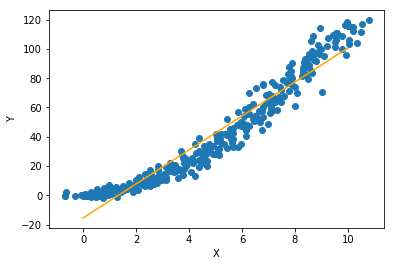

In [5]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
# Assume Y = w0 + w1*X + w2*Xˆ2 = (w0, w1, w2).(1, X, Xˆ2) = W.X2
# X2 contains 1, X and Xˆ2.
X2 = np.matrix(np.hstack((np.hstack((np.ones((len(X),1)), X.reshape(-1,1))), X.reshape(-1,1) * X.reshape(-1, 1))))
W = X2.T.dot(X2).I.dot(X2.T).dot(Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

Y = -1.71 + 3.02*X + 0.87*Xˆ2


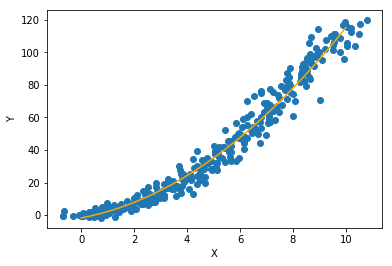

In [7]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 2. Parabola Estimation

In [8]:
X_and_Y = np.load('./q2-parabola.npy')
X = X_and_Y[:, 0] # Shape: (300,)
Y = X_and_Y[:, 1] # Shape: (300,)

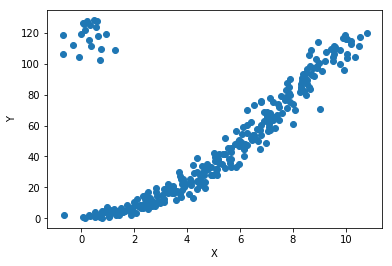

In [9]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### (a) L2 norm

In [10]:
X2 = np.matrix(np.hstack((np.hstack((np.ones((len(X),1)), X.reshape(-1,1))), X.reshape(-1,1) * X.reshape(-1, 1))))
W = X2.T.dot(X2).I.dot(X2.T).dot(Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

Y = 51.07 + -16.06*X + 2.36*Xˆ2


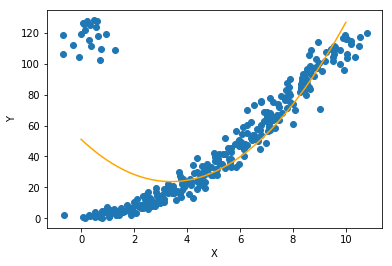

In [11]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### (b) L1 norm

In [12]:
def g(W,X,Y):
    return np.sum(np.abs(X.dot(W.T) - Y.reshape((Y.shape[0], 1))))

In [13]:
def gradient(W,X,Y):
    return np.sign(X.dot(W.T) - Y.reshape((Y.shape[0], 1))).T.dot(X).T

In [14]:
threshold = 0.00001
eta = 0.000001
iterations = 300000
X2 = np.matrix(np.hstack((np.hstack((np.ones((len(X),1)), X.reshape(-1,1))), X.reshape(-1,1) * X.reshape(-1, 1))))
W = np.zeros((1, X2.shape[1]))
Ls = []
for i in range(iterations):
    W -= eta * gradient(W,X2,Y).T
    Ls.append(g(W,X2,Y))
    if i >= 1 and abs(Ls[-1] - Ls[-2]) < threshold:
        break

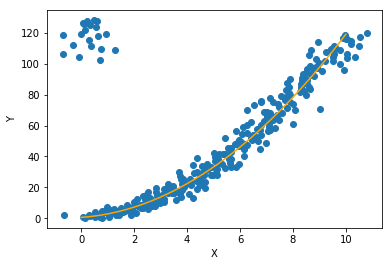

In [15]:
w0, w1, w2 = np.array(W).reshape(-1)
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 3. Perceptron Learning

In [16]:
from sklearn import preprocessing
import numpy as np
import pandas as pd

# load iris_train.data and iris_test.data
pd_train = pd.read_csv("iris/iris_train.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])
pd_test = pd.read_csv("iris/iris_test.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])

# parse the features and labels as numpy arrays.
X_train = pd_train.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_train = pd_train.as_matrix(columns=["label"]).ravel()
X_test = pd_test.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_test = pd_test.as_matrix(columns=["label"]).ravel()

# Encode labels
le = preprocessing.LabelEncoder()
le.fit(y_train)
print(le.classes_)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

['Iris-setosa' 'Iris-versicolor']


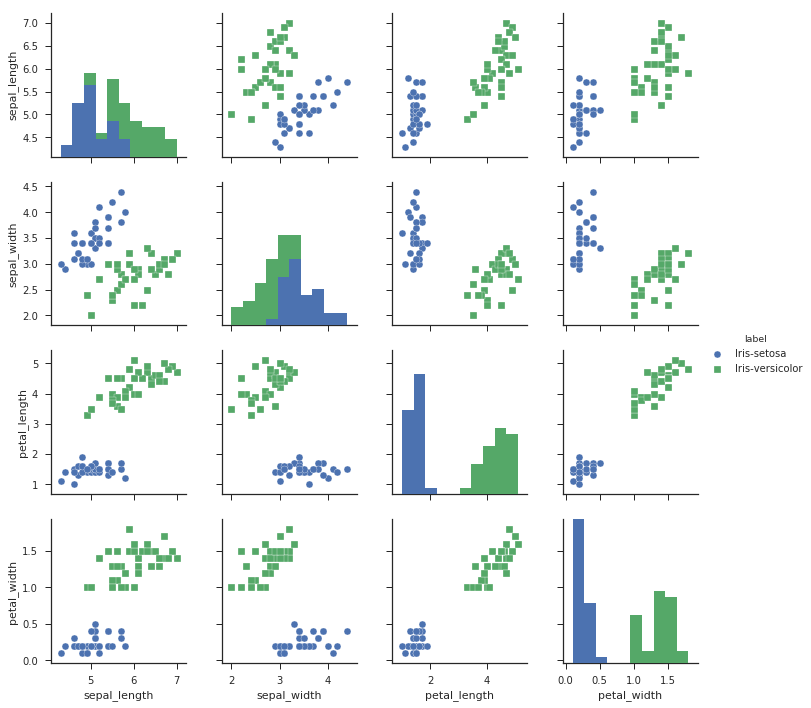

In [17]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(pd_train, hue="label", markers=["o", "s"])

In [18]:
def f(x, w, b):
    return 1 if w.dot(x) + b >= 0 else -1

In [19]:
def allCorrect(X, w, b, Y):
    for i, x in enumerate(X):
        if (f(x, w, b) == 1 and Y[i] == 1) or (f(x, w, b) == -1 and Y[i] == 0):
            continue
        else:
            return 0
    return 1

In [20]:
def correct(x, w, b, y):
    if (f(x, w, b) == 1 and y == 1) or (f(x, w, b) == -1 and y == 0):
        return 1
    else:
        return 0

In [21]:
def acc(X, w, b, Y):
    predict = X.dot(w.T) + b
    temp = [1 if ((predict[i] >= 0 and Y[i] == 1) or (predict[i] < 0 and Y[i] == 0)) else 0 for i in range(X.shape[0])]
    return sum(temp) * 1.0 / len(temp)

In [22]:
def precision(X, w, b, Y):
    predict = X.dot(w.T) + b
    truePositive = sum([1 if predict[i] >= 0 and Y[i] == 1 else 0 for i in range(X.shape[0])])
    outPositive = sum([1 if predict[i] >= 0 else 0 for i in range(X.shape[0])])
    return truePositive * 1.0 / outPositive if truePositive else 0.0

In [23]:
def recall(X, w, b, Y):
    predict = X.dot(w.T) + b
    truePositive = sum([1 if predict[i] >= 0 and Y[i] == 1 else 0 for i in range(X.shape[0])])
    conditionPositive = sum([1 if Y[i] == 1 else 0 for i in range(X.shape[0])])
    return truePositive * 1.0 / conditionPositive if truePositive else 0.0

In [24]:
def FValue(X, w, b, Y):
    p, r = precision(X, w, b, Y), recall(X, w, b, Y)
    return 2.0 * p * r / (p + r) if p and r else 0.0

In [25]:
import random

lam = 1.0
b = 0.0
w = np.zeros((1, X_train.shape[1]))
ws, bs = [], []
errs_train, errs_test = [], []
accs, pres, recs, fs = [], [], [], []

while not allCorrect(X_train, w, b, y_train):
    i = random.randint(0, X_train.shape[0]-1)
    if correct(X_train[i], w, b, y_train[i]):
        continue
    else:
        if y_train[i]:
            w += lam * (y_train[i] - f(X_train[i], w, b)) * X_train[i]
            b += lam * (y_train[i] - f(X_train[i], w, b))
        else:
            w += lam * (y_train[i] - 1 - f(X_train[i], w, b)) * X_train[i]
            b += lam * (y_train[i] - 1 - f(X_train[i], w, b))
    accs.append(acc(X_test, w, b, y_test))
    errs_train.append(1.0 - acc(X_train, w, b, y_train))
    errs_test.append(1.0 - accs[-1])
    pres.append(precision(X_test, w, b, y_test))
    recs.append(recall(X_test, w, b, y_test))
    fs.append(FValue(X_test, w, b, y_test))

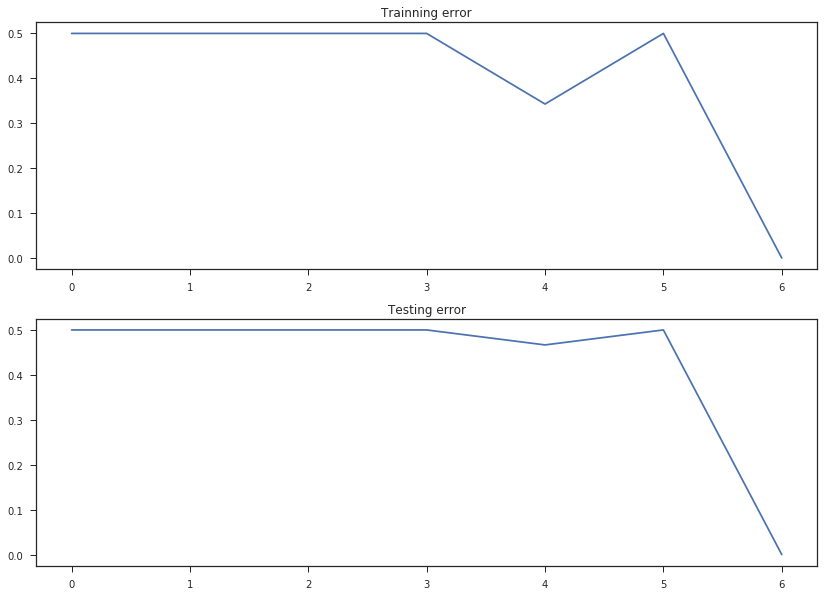

In [26]:
plt.figure(figsize=(14, 10))
t = range(len(errs_train))
ax = plt.subplot(211)
ax.set_title("Trainning error")
plt.plot(t, errs_train)

ax = plt.subplot(212)
ax.set_title("Testing error")
plt.plot(t, errs_test)
plt.show()

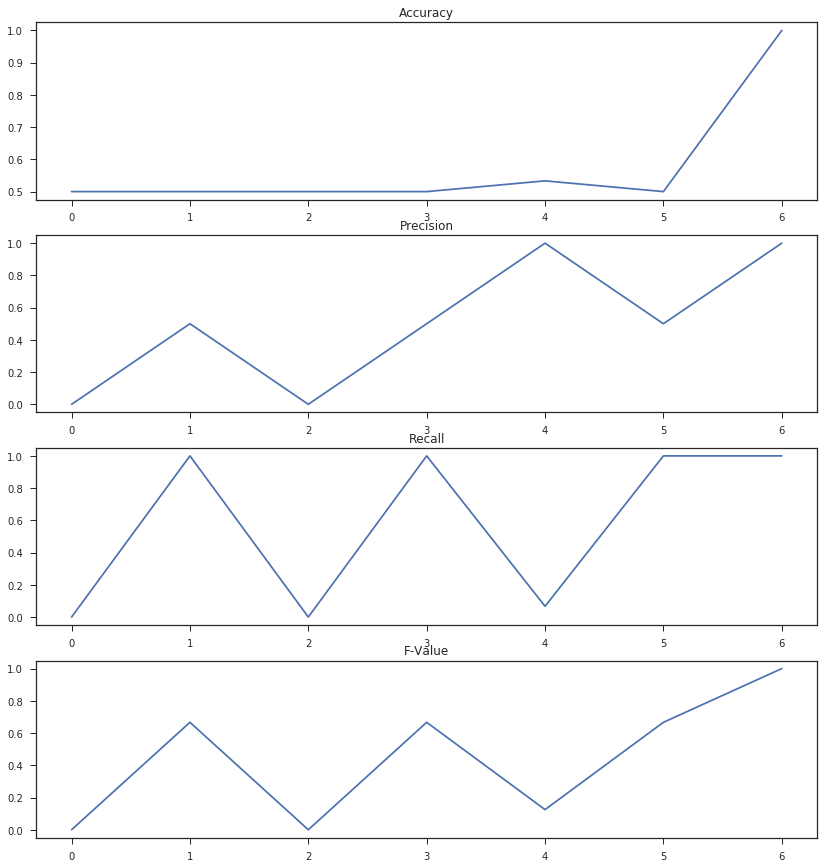

In [27]:
plt.figure(figsize=(14, 15))
t = range(len(accs))
ax = plt.subplot(411)
ax.set_title("Accuracy")
plt.plot(t, accs)

ax = plt.subplot(412)
ax.set_title("Precision")
plt.plot(t, pres)

ax = plt.subplot(413)
ax.set_title("Recall")
plt.plot(t, recs)

ax = plt.subplot(414)
ax.set_title("F-Value")
plt.plot(t, fs)
plt.show()

In [28]:
w0, w1, w2, w3 = np.array(w).reshape(-1)
print('Y = {:.2f}*X1 + {:.2f}*X2 + {:.2f}*X3 + {:.2f}*X4'.format(w0, w1, w2, w3))

Y = -3.40*X1 + -9.80*X2 + 16.40*X3 + 7.20*X4


# 4. Feed Forward Neural Network

In [4]:
from utils import load_mnist
(x_train, y_train), (x_test, y_test) = load_mnist()
labels = np.array(range(10)).reshape((10,1))
x_train_flatten = x_train.reshape((x_train.shape[0], -1))
x_test_flatten = x_test.reshape((x_test.shape[0], -1))
y_train_labels = np.dot(y_train, labels).reshape((y_train.shape[0], ))
y_test_labels = np.dot(y_test, labels).reshape((y_test.shape[0], ))

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
s = np.arange(x_train_flatten.shape[0])
np.random.shuffle(s)

In [6]:
x_train_flatten = x_train_flatten[s]
y_train_labels = y_train_labels[s]
y_train = y_train[s]

In [7]:
# choose a balanced split
size_train = 50000
size_test = 10000

temp = [0] * 10
x_train50000 = []
y_train50000 = []
x_valid10000 = []
y_valid10000 = []
for i in range(len(x_train_flatten)):
    if temp[int(y_train_labels[i])] < (size_train / 10):
        x_train50000.append(x_train_flatten[i])
        y_train50000.append(y_train[i])
        temp[int(y_train_labels[i])] += 1
    else:
        x_valid10000.append(x_train_flatten[i])
        y_valid10000.append(y_train[i])
        
x_train50000, y_train50000 = np.array(x_train50000), np.array(y_train50000)
x_valid10000, y_valid10000 = np.array(x_valid10000), np.array(y_valid10000)

In [8]:
x_train50000.shape, y_train50000.shape, x_valid10000.shape, y_valid10000.shape

((50000, 784), (50000, 10), (10000, 784), (10000, 10))

## 4.1 One hidden layer

In [9]:
# helper function to plot the training history
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.utils.vis_utils import plot_model

In [11]:
model = Sequential()
model.add(Dense(512, input_dim=784, init='uniform', activation='relu'))
model.add(Dense(10, activation="softmax"))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, activation="relu", kernel_initializer="uniform")`
  


In [12]:
pngModelPath = "model1.png"
plot_model(model, to_file=pngModelPath, show_shapes=True)

In [13]:
model_info = model.fit(x_train50000, y_train50000,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(x_valid10000, y_valid10000))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.2035 - acc: 0.7552 - val_loss: 0.6581 - val_acc: 0.8655
Epoch 2/50
27392/50000 [===============>..............] - ETA: 2s - loss: 0.6292 - acc: 0.8561

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plot_model_history(model_info)

## 4.2 Two hidden layers

In [41]:
model = Sequential()
model.add(Dense(512, input_dim=784, init='uniform', activation='relu'))
model.add(Dense(512, init="uniform", activation="relu"))
model.add(Dense(10, activation="softmax"))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
model.summary()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [42]:
pngModelPath = "model2.png"
plot_model(model, to_file=pngModelPath, show_shapes=True)

In [43]:
model_info = model.fit(x_train50000, y_train50000,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(x_valid10000, y_valid10000))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.4790 - acc: 0.6957 - val_loss: 0.7475 - val_acc: 0.8592
Epoch 2/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.5927 - acc: 0.8600 - val_loss: 0.4530 - val_acc: 0.8909
Epoch 3/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.4315 - acc: 0.8866 - val_loss: 0.3776 - val_acc: 0.9022
Epoch 4/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.3719 - acc: 0.8977 - val_loss: 0.3381 - val_acc: 0.9086
Epoch 5/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.3384 - acc: 0.9055 - val_loss: 0.3160 - val_acc: 0.9135
Epoch 6/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.3151 - acc: 0.9116 - val_loss: 0.2952 - val_acc: 0.9169
Epoch 7/50
50000/50000 [==============================] - 9s 188us/step - loss: 0.2971 - acc: 0.9159 - val_loss: 0.2

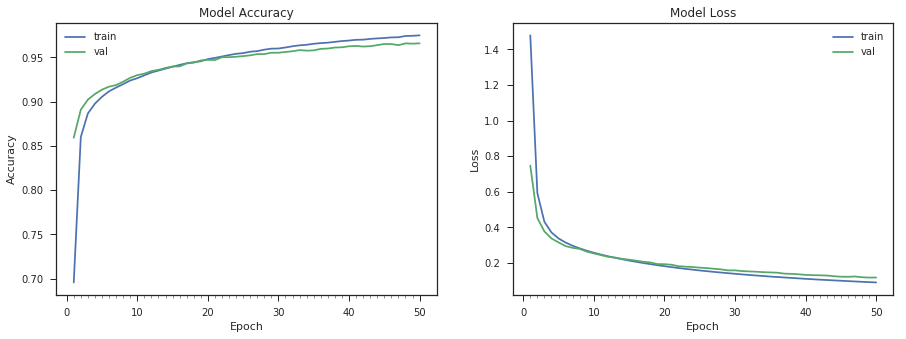

In [44]:
import matplotlib.pyplot as plt

plot_model_history(model_info)

# 5. Convolutional Neural Network

In [21]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"# If using tensorflow, set image dimensions order

In [22]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [23]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [24]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  x_train.shape
num_test, _, _, _ =  x_test.shape
num_classes = len(np.unique(y_train))

In [25]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [26]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
# convert class labels to binary class labels
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [27]:
x_train.shape

(50000, 3, 32, 32)

In [28]:
y_train.shape

(50000, 10)

In [50]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(3, 32, 32) , padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.4))

# model.add(Convolution2D(512, 3, 3, border_mode='same', activation='relu'))
# model.add(Convolution2D(512, 3, 3, border_mode='same', activation='relu'))
# model.add(Convolution2D(512, 3, 3, border_mode='same', activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(Convolution2D(512, 3, 3, border_mode='same', activation='relu'))
# model.add(Convolution2D(512, 3, 3, border_mode='same', activation='relu'))
# model.add(Convolution2D(512, 3, 3, border_mode='same', activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(215, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.1)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 32, 16, 16)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 64, 16, 16)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 8, 8)          0         
__________

In [41]:
pngModelPath = "model3.png"
plot_model(model, to_file=pngModelPath, show_shapes=True)

In [47]:
model_info = model.fit(x_train, y_train, 
                       batch_size=128, epochs=200, 
                       validation_data = (x_test, y_test), 
                       verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 1280/50000 [..............................] - ETA: 9:24 - loss: 2.3271 - acc: 0.1008

KeyboardInterrupt: 